**Jupyter-notebook commands**

For executing cells type: **Ctrl + Enter** in the respective cell

For moving to the next/previous cell use the **arrows** or **mouse**

Insert new cells using the **+** button

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
# Load the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data('/home/barbara/Documents/Codettes/MNIST_data/mnist.npz')

In [4]:
# TODO: Number of training examples (hint: use the shape command)
n_train = ?
print("Number of training examples =", n_train)

SyntaxError: invalid syntax (<ipython-input-4-cc4b87b25580>, line 2)

In [5]:
# TODO: Number of testing examples.
n_test = ?
print("Number of testing examples =", n_test)

SyntaxError: invalid syntax (<ipython-input-5-93c28af929a4>, line 2)

In [6]:
# TODO: What's the shape of an traffic sign image?
image_shape = ?
print("Image data shape =", image_shape)

SyntaxError: invalid syntax (<ipython-input-6-cfc6f8ba9a2b>, line 2)

In [7]:
# TODO: How many unique classes/labels there are in the dataset. (hint: use the set command)
n_classes = ?
print("Number of classes =", n_classes)

SyntaxError: invalid syntax (<ipython-input-7-6fcfe9d39af4>, line 2)

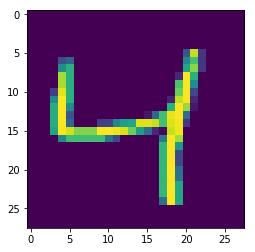

In [4]:
# TODO:Plot one training image
# command plt.imshow()


Label distribution of training:
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]

Relative label distribution of training:
 [ 0.87852269  1.          0.88371403  0.90937407  0.86650845  0.80406408
  0.87778107  0.92924948  0.86784337  0.88237912]


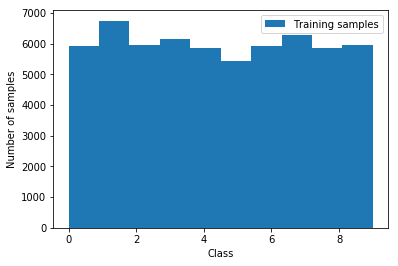

In [5]:
# Check distribution of labels
plt.hist(y_train, n_classes)
plt.ylabel('Number of samples');
plt.xlabel('Class');
plt.legend(['Training samples', 'Validation samples'])

In [13]:
# Adjust the training set in order to meet the input format used in the original
# paper which is 32x32x1

# Add one axis at the end
X_train = np.expand_dims(x_train, axis=3)
X_test = np.expand_dims(x_test, axis=3)
 
# Pad the images by 2 pixels at each side
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [16]:
# TODO: print the new shape of the training set

(60000, 32, 32, 1)

In [ ]:
#TODO: Standardization of the training data
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = ?

One-hot-encoding
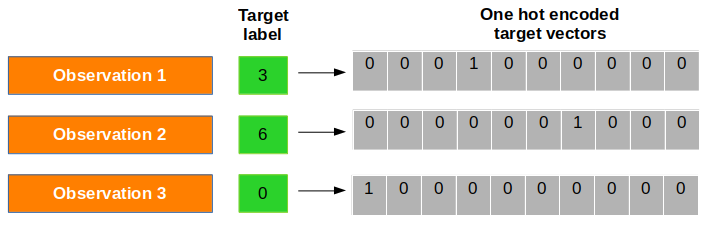

In [1]:
print("Label of first training sample =", y_train[0])

NameError: name 'y_train' is not defined

In [ ]:
#One-hot encoding the labels
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train)

In [ ]:
print("Label of first training sample one-hot-encoded =", Y_train[0])

In [11]:
# Import all the layers that we need for building up the LeNet architecture
# All core layers are defined here: https://keras.io/layers/core/
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D # 2D convolutional layer
from keras.layers import MaxPooling2D # Max pooling
from keras.layers import Flatten # Flattens the input
from keras.layers import Dense # Fully connected layer

**LeNet architecture**
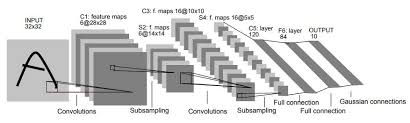

In [12]:
# TODO: Build up the model
# hint: all convolutional layers use a filter of size 5x5 
#       and RELU activation function

model = Sequential()

#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = ?, 
                 kernel_size = 5, 
                 strides = ?, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))
#Pooling layer 1 (Subsampling)
model.add(MaxPooling2D(pool_size = 2, strides = ?))

#Layer 2
#Conv Layer 2
?
#Pooling Layer 2
?

# ----- program until here -----

#Flatten the input
model.add(Flatten())

#Layer 3
#Fully connected layer 1
model.add(Dense(units = ?, activation = 'relu'))

#Layer 4
#Fully connected layer 2
?

#Layer 5
#Output Layer
model.add(Dense(units = ?, activation = 'softmax'))

In [13]:
# Print the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [14]:
# Train the model using Adam optimizer and categorical_crossentropy

# Check if 
## the loss is decreasing
## the accuracy is increasing

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train ,Y_train, epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1470 - acc: 0.9550


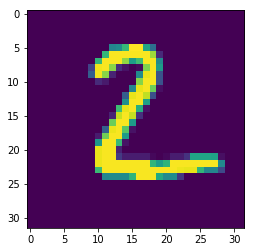

In [15]:
# Show one sample test image: TODO: choose a test image
plt.imshow(X_test[?][:,:,-1])
test_image = np.expand_dims(X_test[1,:], axis=0)

In [22]:
# Predict the class of this test image
y_pred = model.predict(test_image)
print("One-hot-encoded output vector = ", y_pred)

# Find the respective class
y_pred_class = np.argmax(y_pred, axis = 1)
print("Predicted class = ", y_pred_class)

NameError: name 'model' is not defined

In [20]:
# TODO: Predict on all test data
y_pred = ?

In [21]:
# TODO: Converting one hot vectors to class labels
pred_labels = ?

In [2]:
# Compare prediction with ground truth labels
from sklearn.metrics import accuracy_score

print("Accuracy score = ", accuracy_score(y_test, pred_labels))

/home/barbara/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


NameError: name 'y_test' is not defined